In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [224]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [226]:
df.head()

Unnamed: 0   Country      Continent Production (Tons)  \
0           0    Brazil  South America       768.678.382   
1           1     India           Asia       348.448.000   
2           2     China           Asia       123.059.739   
3           3  Thailand           Asia        87.468.496   
4           4  Pakistan           Asia        65.450.704   

  Production per Person (Kg) Acreage (Hectare) Yield (Kg / Hectare)  
0                  3.668,531        10.226.205             75.167,5  
1                     260721         4.950.000             70.393,5  
2                      88287         1.675.215             73.459,1  
3                  1.264,303         1.336.575             65.442,2  
4                     324219         1.130.820               57.879

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [230]:
df.shape

(103, 7)

In [232]:
#Data Cleaning

In [234]:
#removung commas, and dots

df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [236]:
df.head()

Unnamed: 0   Country      Continent Production (Tons)  \
0           0    Brazil  South America         768678382   
1           1     India           Asia         348448000   
2           2     China           Asia         123059739   
3           3  Thailand           Asia          87468496   
4           4  Pakistan           Asia          65450704   

  Production per Person (Kg) Acreage (Hectare) Yield (Kg / Hectare)  
0                   3668.531          10226205              75167.5  
1                     260721           4950000              70393.5  
2                      88287           1675215              73459.1  
3                   1264.303           1336575              65442.2  
4                     324219           1130820                57879

In [238]:
# changing names of columns

df.rename(columns = { "Production (Tons)" : "Production(Tons)" }, inplace = True )
df.rename(columns = { "Production per Person (Kg)" : "Production_per_Person(Kg)" }, inplace = True )
df.rename(columns = { "Acreage (Hectare)" : "Acreage(Hectare)" }, inplace = True )
df.rename(columns = { "Yield (Kg / Hectare)" : "Yield(Kg/Hectare)" }, inplace = True )

In [240]:
df.head()

Unnamed: 0   Country      Continent Production(Tons)  \
0           0    Brazil  South America        768678382   
1           1     India           Asia        348448000   
2           2     China           Asia        123059739   
3           3  Thailand           Asia         87468496   
4           4  Pakistan           Asia         65450704   

  Production_per_Person(Kg) Acreage(Hectare) Yield(Kg/Hectare)  
0                  3668.531         10226205           75167.5  
1                    260721          4950000           70393.5  
2                     88287          1675215           73459.1  
3                  1264.303          1336575           65442.2  
4                    324219          1130820             57879

In [242]:
# finding null values

df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [244]:
df[df["Acreage(Hectare)"].isnull()]

Unnamed: 0   Country Continent Production(Tons) Production_per_Person(Kg)  \
99          99  Djibouti    Africa               53                        51   

   Acreage(Hectare) Yield(Kg/Hectare)  
99              NaN               NaN

In [246]:
df = df.dropna().reset_index()

In [248]:
df.head()

index  Unnamed: 0   Country      Continent Production(Tons)  \
0      0           0    Brazil  South America        768678382   
1      1           1     India           Asia        348448000   
2      2           2     China           Asia        123059739   
3      3           3  Thailand           Asia         87468496   
4      4           4  Pakistan           Asia         65450704   

  Production_per_Person(Kg) Acreage(Hectare) Yield(Kg/Hectare)  
0                  3668.531         10226205           75167.5  
1                    260721          4950000           70393.5  
2                     88287          1675215           73459.1  
3                  1264.303          1336575           65442.2  
4                    324219          1130820             57879

In [250]:
df.drop(["index", "Unnamed: 0"], axis = 1, inplace = True)

In [252]:
df.head()

Country      Continent Production(Tons) Production_per_Person(Kg)  \
0    Brazil  South America        768678382                  3668.531   
1     India           Asia        348448000                    260721   
2     China           Asia        123059739                     88287   
3  Thailand           Asia         87468496                  1264.303   
4  Pakistan           Asia         65450704                    324219   

  Acreage(Hectare) Yield(Kg/Hectare)  
0         10226205           75167.5  
1          4950000           70393.5  
2          1675215           73459.1  
3          1336575           65442.2  
4          1130820             57879

In [254]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [256]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [258]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [260]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [262]:
### Univatiate Analysis ###

In [264]:
df.head()

Country      Continent  Production(Tons)  Production_per_Person(Kg)  \
0    Brazil  South America       768678382.0                   3668.531   
1     India           Asia       348448000.0                 260721.000   
2     China           Asia       123059739.0                  88287.000   
3  Thailand           Asia        87468496.0                   1264.303   
4  Pakistan           Asia        65450704.0                 324219.000   

   Acreage(Hectare)  Yield(Kg/Hectare)  
0        10226205.0            75167.5  
1         4950000.0            70393.5  
2         1675215.0            73459.1  
3         1336575.0            65442.2  
4         1130820.0            57879.0

In [266]:
# How many countries produce sugarcane from each continent ?

In [268]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

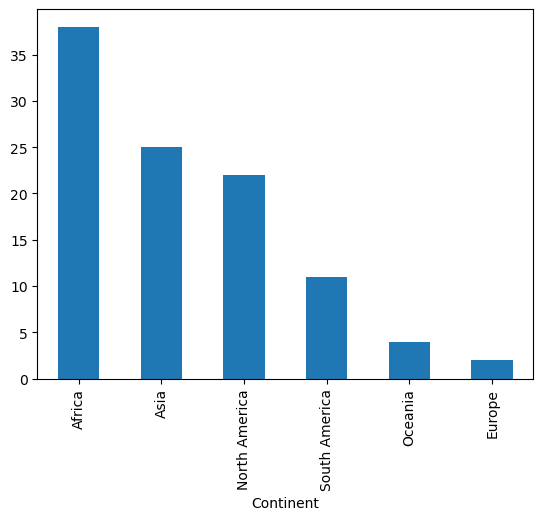

In [270]:
df["Continent"].value_counts().plot(kind = "bar")

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Count'>

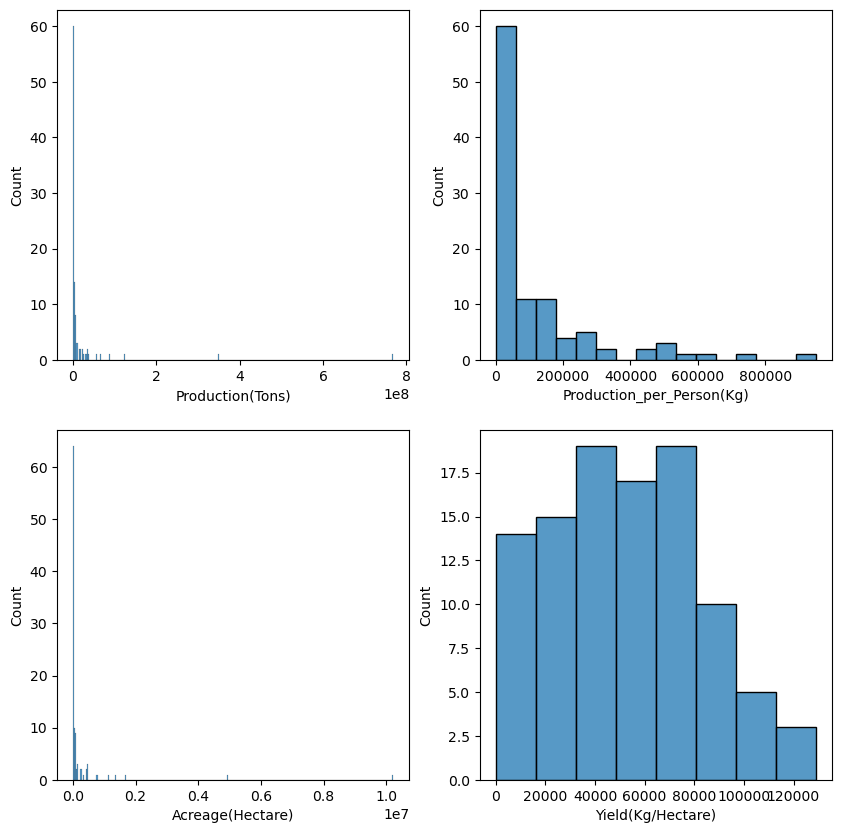

In [272]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(df["Production(Tons)"])

plt.subplot(2,2,2)
sns.histplot(df["Production_per_Person(Kg)"])

plt.subplot(2,2,3)
sns.histplot(df["Acreage(Hectare)"])

plt.subplot(2,2,4)
sns.histplot(df["Yield(Kg/Hectare)"])


<Axes: ylabel='Yield(Kg/Hectare)'>

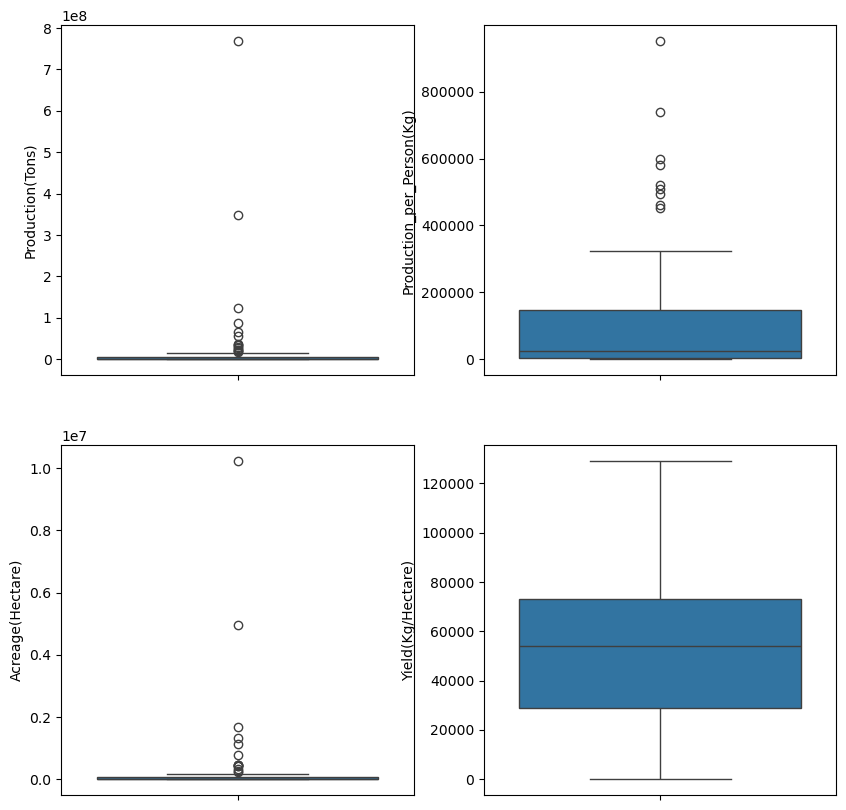

In [273]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])

plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])

plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])

plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])


In [276]:
df.describe()

Production(Tons)  Production_per_Person(Kg)  Acreage(Hectare)  \
count      1.020000e+02                 102.000000      1.020000e+02   
mean       1.850372e+07              112952.435755      2.498981e+05   
std        8.419149e+07              176651.341929      1.137003e+06   
min        1.000000e+00                   0.000000      0.000000e+00   
25%        6.251875e+04                3671.910000      1.104000e+03   
50%        1.440044e+06               25572.500000      1.655800e+04   
75%        6.426824e+06              146384.750000      8.047400e+04   
max        7.686784e+08              951087.000000      1.022620e+07   

       Yield(Kg/Hectare)  
count         102.000000  
mean        52628.078431  
std         30504.676683  
min            10.000000  
25%         29072.025000  
50%         54108.950000  
75%         73282.700000  
max        129049.300000

In [278]:
### Bivariate analysis

In [280]:
df.head()

Country      Continent  Production(Tons)  Production_per_Person(Kg)  \
0    Brazil  South America       768678382.0                   3668.531   
1     India           Asia       348448000.0                 260721.000   
2     China           Asia       123059739.0                  88287.000   
3  Thailand           Asia        87468496.0                   1264.303   
4  Pakistan           Asia        65450704.0                 324219.000   

   Acreage(Hectare)  Yield(Kg/Hectare)  
0        10226205.0            75167.5  
1         4950000.0            70393.5  
2         1675215.0            73459.1  
3         1336575.0            65442.2  
4         1130820.0            57879.0

In [282]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")

In [284]:
df_new

Production(Tons)
Country                    
Brazil          768678382.0
India           348448000.0
China           123059739.0
Thailand         87468496.0
Pakistan         65450704.0
...                     ...
Spain                 394.0
Lebanon                97.0
Singapore              50.0
Samoa                  12.0
Syria                   1.0

[102 rows x 1 columns]

In [286]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [288]:
df_new

Production(Tons)  Production(Tons)_percent
Country                                              
Brazil          768678382.0              4.072729e+01
India           348448000.0              1.846200e+01
China           123059739.0              6.520138e+00
Thailand         87468496.0              4.634389e+00
Pakistan         65450704.0              3.467809e+00
...                     ...                       ...
Spain                 394.0              2.087551e-05
Lebanon                97.0              5.139401e-06
Singapore              50.0              2.649176e-06
Samoa                  12.0              6.358022e-07
Syria                   1.0              5.298352e-08

[102 rows x 2 columns]

<Axes: ylabel='Production(Tons)_percent'>

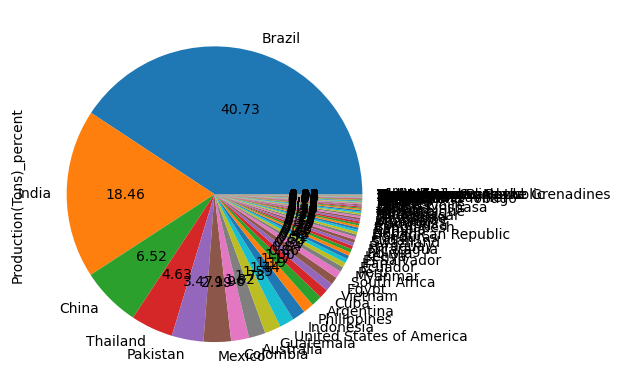

In [290]:
df_new["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Country'>

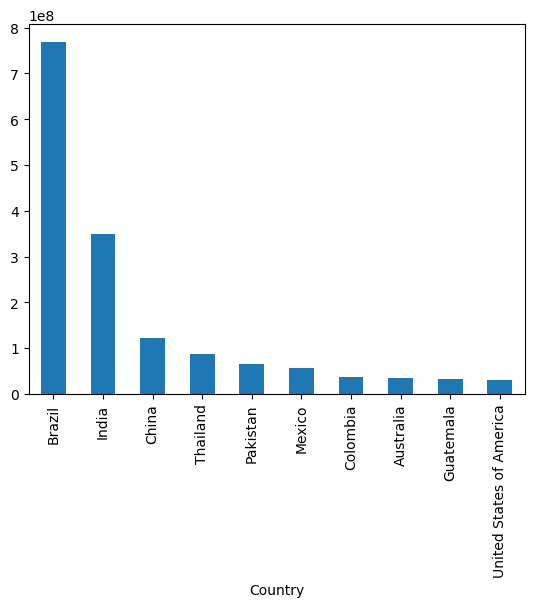

In [291]:
df_new["Production(Tons)"].head(10).plot(kind = "bar")

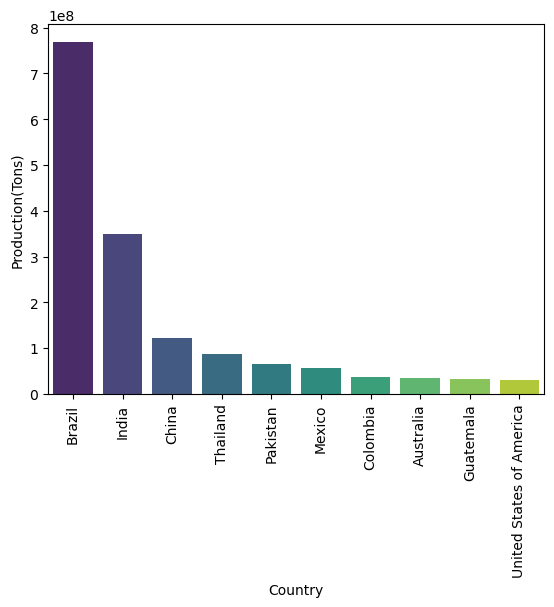

In [294]:

# Create a barplot with a different color for each bar using hue
ax = sns.barplot(data=df_new.head(10), x="Country", y="Production(Tons)", hue="Country", dodge=False, palette="viridis", legend=False)

# Rotate the x-axis labels for better readability
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

In [296]:
df_new["Acreage(Hectare)"] = df["Acreage(Hectare)"]

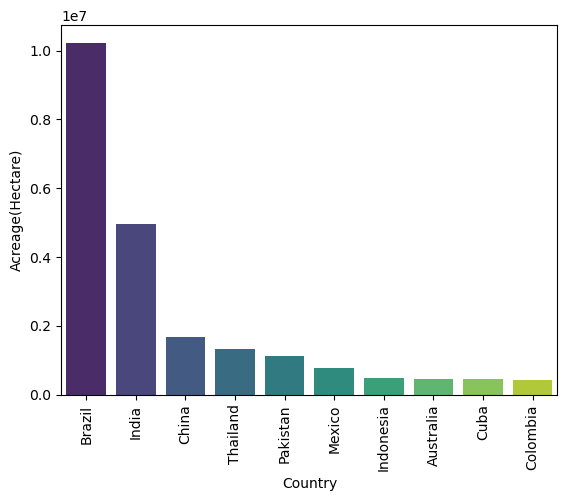

In [298]:

# Sort the DataFrame by the 'Acreage(Hectare)' column in descending order
df_acr = df.sort_values("Acreage(Hectare)", ascending=False)

# Create a barplot for the top 10 countries by acreage
ax = sns.barplot(data=df_acr.head(10), x="Country", y="Acreage(Hectare)" ,hue="Country", dodge=False, palette="viridis", legend=False)

# Rotate the x-axis labels for better readability
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

In [300]:
df_new.head()

Production(Tons)  Production(Tons)_percent  Acreage(Hectare)
Country                                                               
Brazil         768678382.0                 40.727285               NaN
India          348448000.0                 18.462001               NaN
China          123059739.0                  6.520138               NaN
Thailand        87468496.0                  4.634389               NaN
Pakistan        65450704.0                  3.467809               NaN

[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

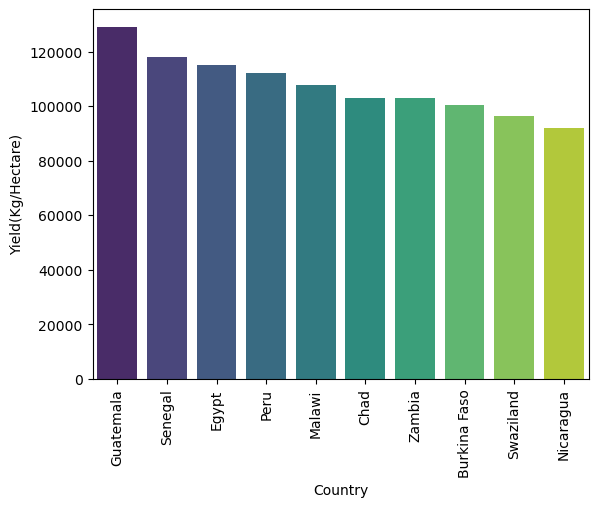

In [302]:

# Sort the DataFrame by the 'Acreage(Hectare)' column in descending order
df_yeild = df.sort_values("Yield(Kg/Hectare)", ascending=False)

# Create a barplot for the top 10 countries by acreage
ax = sns.barplot(data=df_yeild.head(10), x="Country", y="Yield(Kg/Hectare)" ,hue="Country", dodge=False, palette="viridis", legend=False)

# Rotate the x-axis labels for better readability
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Paraguay'),
 Text(1, 0, 'Colombia'),
 Text(2, 0, 'Trinidad and Tobago'),
 Text(3, 0, 'Panama'),
 Text(4, 0, 'Jamaica'),
 Text(5, 0, 'Ecuador'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Dominican Republic'),
 Text(8, 0, 'Mexico'),
 Text(9, 0, 'Pakistan')]

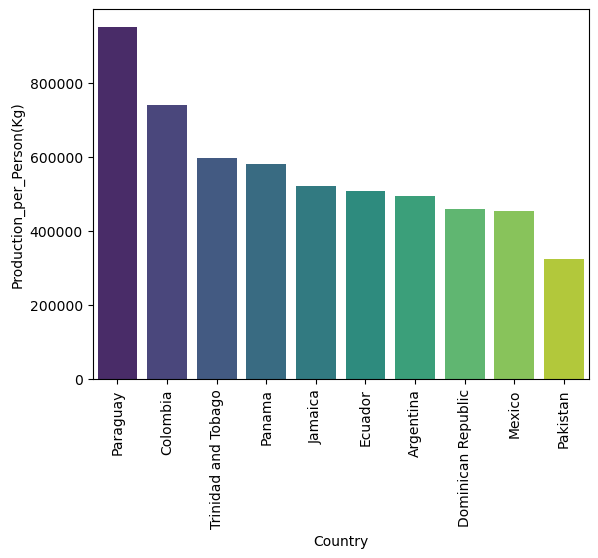

In [304]:
# highest productuion per percentage


# Sort the DataFrame by the 'Acreage(Hectare)' column in descending order
df_procuction_per_kg = df.sort_values("Production_per_Person(Kg)", ascending=False)

# Create a barplot for the top 10 countries by acreage
ax = sns.barplot(data=df_procuction_per_kg.head(10), x="Country", y="Production_per_Person(Kg)" ,hue="Country", dodge=False, palette="viridis", legend=False)

# Rotate the x-axis labels for better readability
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

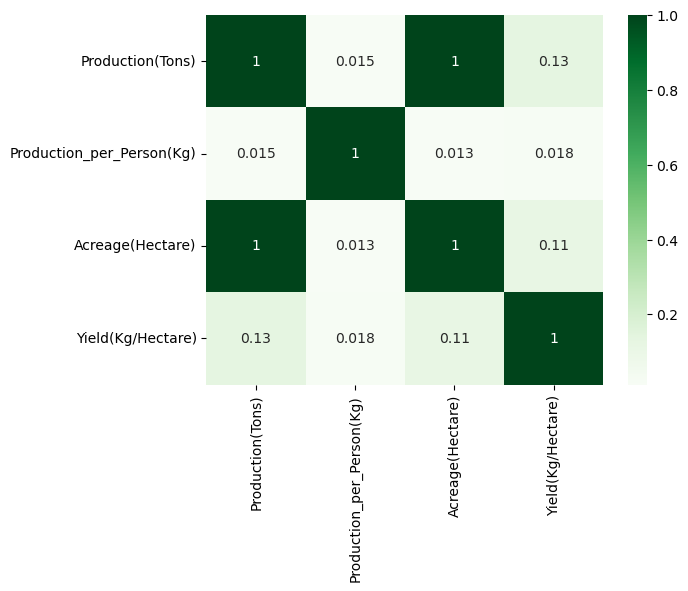

In [312]:
# Co - relation

# Select only numeric columns from the DataFrame
df_numeric = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

# Show the plot
plt.show()

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

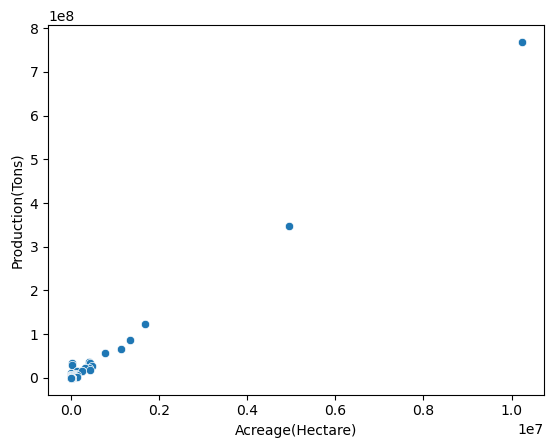

In [316]:
# Do countries with highest land, produce more sugarcane .

sns.scatterplot( data = df, x = "Acreage(Hectare)", y = "Production(Tons)" )

In [318]:
df.head()

Country      Continent  Production(Tons)  Production_per_Person(Kg)  \
0    Brazil  South America       768678382.0                   3668.531   
1     India           Asia       348448000.0                 260721.000   
2     China           Asia       123059739.0                  88287.000   
3  Thailand           Asia        87468496.0                   1264.303   
4  Pakistan           Asia        65450704.0                 324219.000   

   Acreage(Hectare)  Yield(Kg/Hectare)  
0        10226205.0            75167.5  
1         4950000.0            70393.5  
2         1675215.0            73459.1  
3         1336575.0            65442.2  
4         1130820.0            57879.0

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

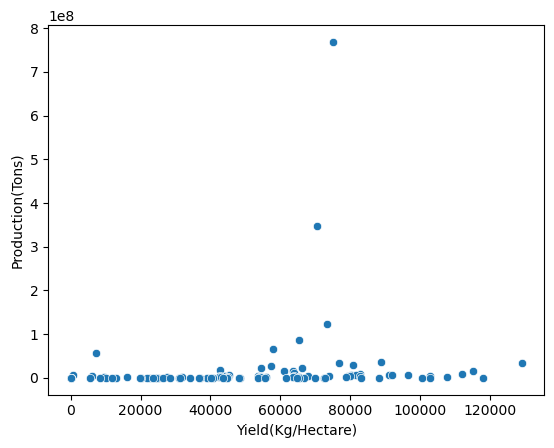

In [320]:
# Do countries which yeild more sugarcane per hectare produce more sugarcane in total ?

sns.scatterplot( data = df, x = "Yield(Kg/Hectare)", y = "Production(Tons)" )

In [322]:
# Analysis for continent
df_continent = df.groupby("Continent").sum()

In [324]:
df_continent

Country  \
Continent                                                          
Africa         EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...   
Asia           IndiaChinaThailandPakistanIndonesiaPhilippines...   
Europe                                             PortugalSpain   
North America  MexicoGuatemalaUnited States of AmericaCubaEl ...   
Oceania                       AustraliaFijiPapua New GuineaSamoa   
South America  BrazilColombiaArgentinaPeruEcuadorBoliviaParag...   

               Production(Tons)  Production_per_Person(Kg)  Acreage(Hectare)  \
Continent                                                                      
Africa               89681472.0                2332636.293         1439089.0   
Asia                721930425.0                1857769.303        10608319.0   
Europe                   5823.0                    536.000              71.0   
North America       173995947.0                3796081.508         1581983.0   
Oceania              36177574.0                  28593.605          490909.0   
South America       865588126.0                3505531.738        11369236.0   

               Yield(Kg/Hectare)  
Continent                         
Africa                 2142107.5  
Asia                   1171871.4  
Europe                  131870.9  
North America          1082602.4  
Oceania                 162419.1  
South America           677192.7

<Axes: xlabel='Continent'>

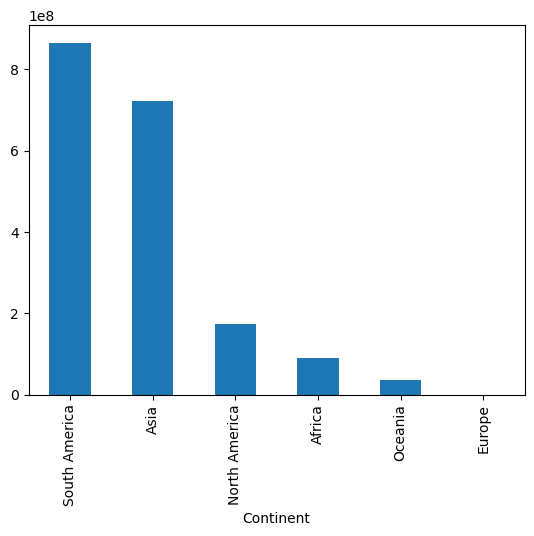

In [326]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind = "bar")

In [332]:
# Do number of continents in a Continent effects production of sugarcane ?

df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [334]:
df_continent

Country  \
Continent                                                          
Africa         EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...   
Asia           IndiaChinaThailandPakistanIndonesiaPhilippines...   
Europe                                             PortugalSpain   
North America  MexicoGuatemalaUnited States of AmericaCubaEl ...   
Oceania                       AustraliaFijiPapua New GuineaSamoa   
South America  BrazilColombiaArgentinaPeruEcuadorBoliviaParag...   

               Production(Tons)  Production_per_Person(Kg)  Acreage(Hectare)  \
Continent                                                                      
Africa               89681472.0                2332636.293         1439089.0   
Asia                721930425.0                1857769.303        10608319.0   
Europe                   5823.0                    536.000              71.0   
North America       173995947.0                3796081.508         1581983.0   
Oceania              36177574.0                  28593.605          490909.0   
South America       865588126.0                3505531.738        11369236.0   

               Yield(Kg/Hectare)  number_of_countries  
Continent                                              
Africa                 2142107.5                   38  
Asia                   1171871.4                   25  
Europe                  131870.9                    2  
North America          1082602.4                   22  
Oceania                 162419.1                    4  
South America           677192.7                   11

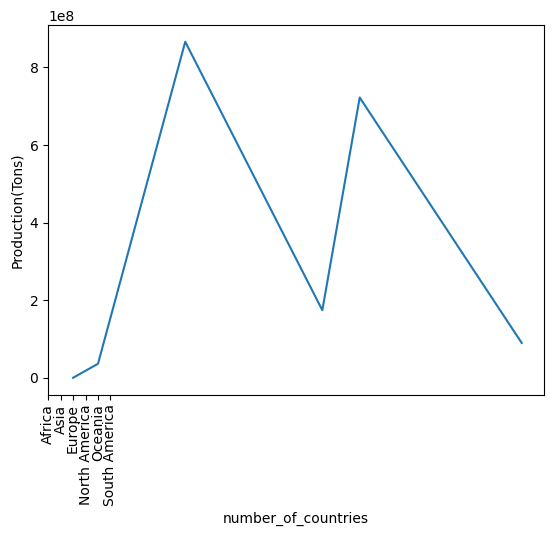

In [336]:
continent_names = df_continent.index.to_list()

# Assuming 'number_of_continents' is an index or a column, and you're plotting 'Production(Tons)' against 'number_of_countries'
sns.lineplot(data=df_continent, x="number_of_countries", y="Production(Tons)")

# Set the x-axis labels with continent names, rotating them for better readability
plt.xticks(ticks=range(len(continent_names)), labels=continent_names, rotation=90)

# Show the plot
plt.show()

In [340]:
df_continent.corr

<bound method DataFrame.corr of                                                          Country  \
Continent                                                          
Africa         EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...   
Asia           IndiaChinaThailandPakistanIndonesiaPhilippines...   
Europe                                             PortugalSpain   
North America  MexicoGuatemalaUnited States of AmericaCubaEl ...   
Oceania                       AustraliaFijiPapua New GuineaSamoa   
South America  BrazilColombiaArgentinaPeruEcuadorBoliviaParag...   

               Production(Tons)  Production_per_Person(Kg)  Acreage(Hectare)  \
Continent                                                                      
Africa               89681472.0                2332636.293         1439089.0   
Asia                721930425.0                1857769.303        10608319.0   
Europe                   5823.0                    536.000              71.0   
North America       173

<Axes: ylabel='Production(Tons)'>

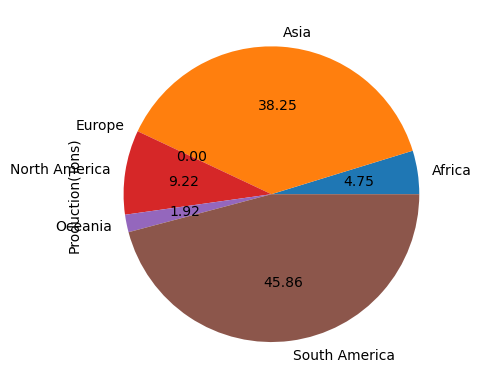

In [342]:
# Continents with highest land produces sugarcane

df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f")